In [2]:
import sys
sys.path.append("..")
from jnk3_noask1.model_analysis.jnk3_no_ask1 import model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


In [5]:
# Loading sampling parameter from pydream run

chain0 = np.load('../jnk3_noask1/model_analysis/calibration_normalization_preequilibration/jnk3_dreamzs_5chain_sampled_params_chain_0_50000.npy')
chain1 = np.load('../jnk3_noask1/model_analysis/calibration_normalization_preequilibration/jnk3_dreamzs_5chain_sampled_params_chain_1_50000.npy')
chain2 = np.load('../jnk3_noask1/model_analysis/calibration_normalization_preequilibration/jnk3_dreamzs_5chain_sampled_params_chain_2_50000.npy')
chain3 = np.load('../jnk3_noask1/model_analysis/calibration_normalization_preequilibration/jnk3_dreamzs_5chain_sampled_params_chain_3_50000.npy')
chain4 = np.load('../jnk3_noask1/model_analysis/calibration_normalization_preequilibration/jnk3_dreamzs_5chain_sampled_params_chain_4_50000.npy')

total_iterations = len(chain0[0])
burnin = total_iterations / 2
samples = np.concatenate((chain0[burnin:, :], chain1[burnin:, :], chain2[burnin:, :],
                          chain3[burnin:, :], chain4[burnin:, :]))


In [6]:
# setting up variables for plotting

idx_pars_calibrate = [1, 15, 17, 19, 24, 25, 26, 27]

ndims = len(idx_pars_calibrate)
colors = sns.color_palette(n_colors=ndims)
rows = 4
columns = 2
counter = 0

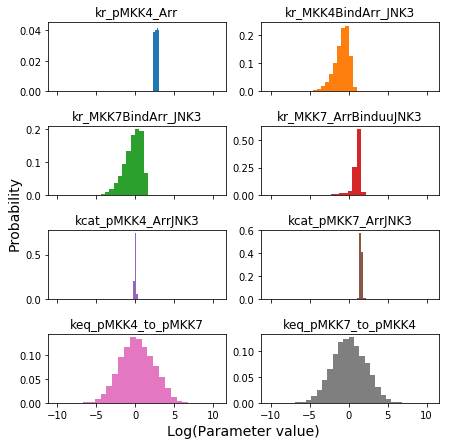

In [7]:
# plotting results

f, axes = plt.subplots(4, 2, figsize=(7, 7), sharex=True)
for r in range(rows):
    for c in range(columns):
        weights = np.ones_like(samples[:, counter])/float(len(samples[:, counter]))
        # sns.distplot(samples[:, counter], hist=True, color=colors[counter], norm_hist=True, ax=axes[r, c])
        axes[r, c].hist(samples[:, counter], bins=25, color=colors[counter], weights=weights)
        axes[r, c].set_title(model.parameters[idx_pars_calibrate[counter]].name)
        # axes[r, c].set_xlim(-6, 6)
        counter += 1
f.add_subplot(111, frameon=False)
f.subplots_adjust(hspace=0.5)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Log(Parameter value)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.show()